# Plotting standard deviations of the error from real scans and fitting polynomials

Here we load up the files which contain the standard deviations of the distances of all points from a fitted plane, averaged over three runs. Their grouped by the laser id, and the distance of the sensor from the wall.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

wall_stddevs = np.loadtxt("/home/branislav/repos/github_indoor++/pcds/error_measurements/deviations_by_laser_averaged/wall.txt")
floor_stddevs = np.loadtxt("/home/branislav/repos/github_indoor++/pcds/error_measurements/deviations_by_laser_averaged/floor.txt")


The format is five arrays of 16 values corresponding to the five distances and 16 lasers.

In [5]:
wall_stddevs

array([[0.00945079, 0.01000707, 0.00904427, 0.0104084 , 0.00906367,
        0.01019636, 0.00941505, 0.01146727, 0.01004323, 0.01027624,
        0.00950521, 0.01099278, 0.00983575, 0.01100237, 0.00989802,
        0.01130249],
       [0.00833743, 0.00844385, 0.00874048, 0.0087824 , 0.0083232 ,
        0.00900897, 0.00872528, 0.00992566, 0.01013095, 0.01030538,
        0.00921781, 0.0102852 , 0.00904762, 0.01219389, 0.00925696,
        0.01419983],
       [0.00862083, 0.00874237, 0.00903505, 0.00878214, 0.00812785,
        0.00891988, 0.00858012, 0.00942199, 0.01006   , 0.00984419,
        0.00903419, 0.01033703, 0.00894632, 0.01012752, 0.00985601,
        0.01028993],
       [0.00851419, 0.00894146, 0.00844567, 0.0087837 , 0.00814625,
        0.00935904, 0.00851675, 0.00991166, 0.01077794, 0.00978706,
        0.00856255, 0.00972768, 0.00931384, 0.01081605, 0.00902558,
        0.01056724],
       [0.00899065, 0.00952837, 0.00824047, 0.00923926, 0.00958051,
        0.00926102, 0.01121061, 

## Plotting the standard deviations

Plot the standard deviation against the laser id, each line corresponds to one distance from the wall. This shows how the error behaves between the lasers at the same distance. The lasers in the plot are sorted based on the angle, so they are physically in sequence (ascending).

[0, 2, 4, 6, 8, 10, 12, 14, 1, 3, 5, 7, 9, 11, 13, 15]


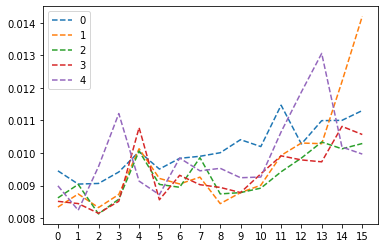

In [7]:
from thesis.utils import sorted_ids_by_angle
print(sorted_ids_by_angle)

for dist in wall_stddevs:
    plt.plot(range(16), dist[sorted_ids_by_angle], "--")
plt.xticks(sorted_ids_by_angle)
plt.legend(range(5))
plt.show()

Same thing with the floor data.

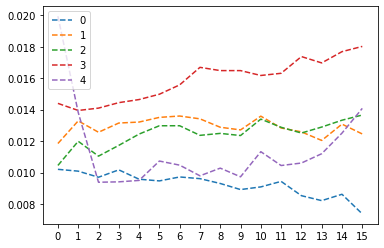

In [36]:
for dist in floor_stddevs:
    plt.plot(range(16), dist[sorted_ids_by_angle], "--")
plt.xticks(range(16))
plt.legend(range(5))
plt.show()

Here we plot the transverse relationship between the distance from the wall and the standard deviation.

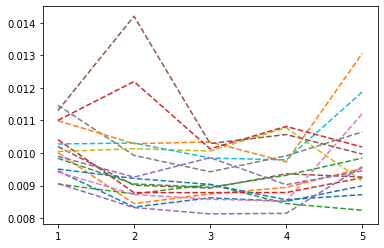

In [37]:
for laser in wall_stddevs.T:
    plt.plot(range(1, 6), laser, "--")
plt.xticks(range(1, 6))
plt.show()

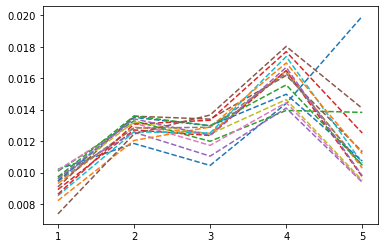

In [38]:
for laser in floor_stddevs.T:
    plt.plot(range(1, 6), laser, "--")
plt.xticks(range(1, 6))
plt.show()

## Making polynomials

Testing to see if it would work to fit a polynomial to this data. This polynomial could then be sampled in the virtual error generation.

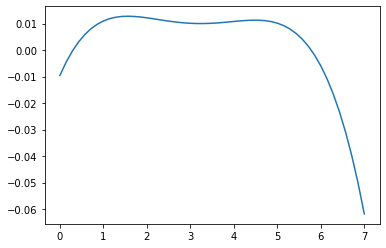

In [39]:
# we have samples at 1,2,3,4 and 5 meters
x = range(1, 6)

# pick random laser 
y = wall_stddevs.T[13]

# fit a polynomial of 4th degree
coefficients = np.polyfit(x, y, 4) 

# plot the resulting polynomial
f = np.poly1d(coefficients)
x_new = np.linspace(0, 7, 50)
y_new = f(x_new)
plt.plot(x_new, y_new)
plt.show()

Then created a reusable function to save the polynomial coefficients per laser

In [40]:
def make_polynomials(stddev_data, scan_type, degree=4, write_to_file=False):
    result = np.zeros([16, 5])
    for i in range(16):
        x = range(1, 6)
        y = stddev_data.T[i]
        coeffs = np.polyfit(x, y, degree)
        result[i, :] = coeffs
    if write_to_file:
        name = f"{scan_type}_polynomials.txt"
        np.savetxt("floor_polynomials.txt", result)
    return result


In [41]:
wall_polynomials = make_polynomials(wall_stddevs, "wall")
floor_polynomials = make_polynomials(floor_stddevs, "floor")

Example of sampling the polynomial, with static boundary conditions for distances less than 1 and more than 5 meters. This would be done in the scanning code.

In [42]:
laser_id = 13
distance = 5.0
poly = np.poly1d(wall_polynomials[laser_id])
if distance < 1.0:
    distance = 1.0
elif distance > 5.0:
    distance = 5.0
sampled_sigma = poly(distance)
sampled_sigma

0.01018127962831441

## Plotting the polynomials for fun.

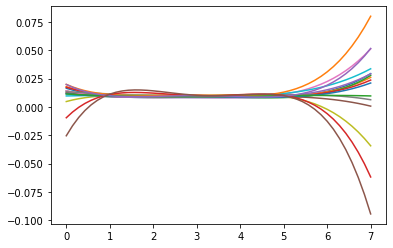

In [43]:
for laser_coefficients in wall_polynomials:
    f = np.poly1d(laser_coefficients)
    x_new = np.linspace(0, 7, 50)
    y_new = f(x_new)
    plt.plot(x_new, y_new)
plt.show()

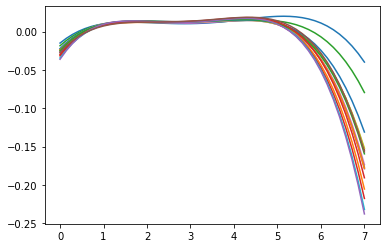

In [44]:
for laser_coefficients in floor_polynomials:
    f = np.poly1d(laser_coefficients)
    x_new = np.linspace(0, 7, 50)
    y_new = f(x_new)
    plt.plot(x_new, y_new)
plt.show()